In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
import skimage.data as skd


In [12]:
n_colors = 64

In [27]:
# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

print(china.shape)

# Save image in file
np.savetxt("china.txt", china.reshape([-1,3]))

(427, 640, 3)


In [28]:
# Load the Color image of the astronaut Eileen Collins
astronaut=skd.astronaut()

astronaut = np.array(astronaut, dtype=np.float64) / 255
print(astronaut.shape)

# Save image in file
np.savetxt("astronaut.txt", astronaut.reshape([-1,3]))


(512, 512, 3)


In [29]:
# Load the image of Chelsea the cat
chelsea=skd.chelsea()

chelsea = np.array(chelsea, dtype=np.float64) / 255
chelsea.shape

print(chelsea.shape)

# Save image in file
np.savetxt("chelsea.txt", chelsea.reshape([-1,3]))

(300, 451, 3)


In [24]:
# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(astronaut.shape)
assert d == 3
image_array = np.reshape(astronaut, (w * h, d))

# Save image in file
image_array.tofile('astronaut.txt', sep='\n')

In [13]:
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")


codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")


Fitting model on a small sub-sample of the data
done in 0.277s.
Predicting color indices on the full image (k-means)
done in 0.007s.
Predicting color indices on the full image (random)
done in 0.010s.


In [14]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

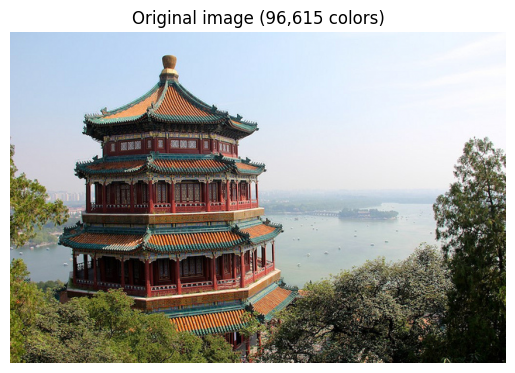

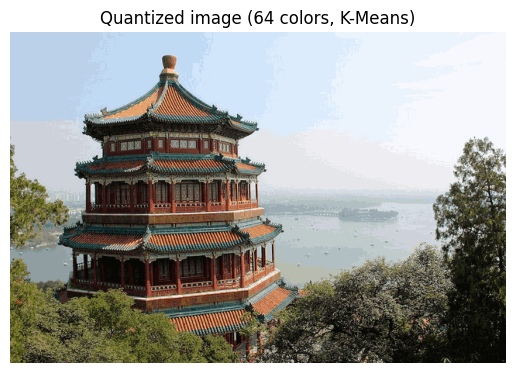

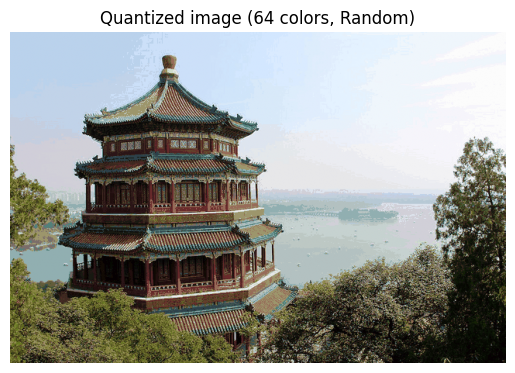

In [15]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()